In [1]:
import scimap as sm
import pandas as pd
import sys
import os
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)

/gpfs/gsfs12/users/vasileiosionat2/conda/envs/scimap-naparijroi/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
import anndata
adata = anndata.read_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")
adata.obs

,SampleID,Region,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,...,CT,kmeans_new,lvl3_spatial_cluster,lvl2_spatial_cluster,lvl1_spatial_cluster,Region_Area,spatial_count_knn,spatial_kmeans_knn,niche,spatial_kmeans_radius
0,HV196B,Epi,4063.439560,117.074176,364.0,22.370634,21.038466,0.339932,0.943005,0.659420,...,Other,keratin epithelial cell,Keratin,Epi (oral),Epithelial,675919.403,6,6,Crevicular,1
1,HV196B,Epi,3906.382114,121.085366,246.0,20.441847,17.120427,0.546409,0.907749,0.615000,...,Other,keratin epithelial cell,Keratin,Epi (oral),Epithelial,675919.403,6,6,Crevicular,1
2,HV196B,Epi,4046.433333,119.300000,150.0,16.610911,12.183316,0.679741,0.887574,0.721154,...,Other,keratin epithelial cell,Keratin,Epi (oral),Epithelial,675919.403,6,6,Crevicular,1
3,HV196B,Epi,3925.083102,125.171745,722.0,36.032598,26.241478,0.685290,0.918575,0.705767,...,Other,keratin epithelial cell,Keratin,Epi (oral),Epithelial,675919.403,6,6,Crevicular,1
4,HV196B,Epi,3950.053150,129.606299,508.0,27.802349,25.184052,0.423653,0.862479,0.627160,...,Other,keratin epithelial cell,Keratin,Epi (oral),Epithelial,675919.403,6,6,Crevicular,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370783,HV195A1,Epi,3129.127196,3308.111736,1423.0,51.882097,36.168967,0.716937,0.918065,0.748947,...,Other,proliferating epithelial cell,Proliferating,Epi (oral),Epithelial,438618.240,6,1,Spinous,5
370784,HV195A1,Epi,2959.323333,3307.864444,900.0,37.111385,31.354542,0.534961,0.955414,0.802139,...,Other,proliferating epithelial cell,Proliferating,Epi (oral),Epithelial,438618.240,6,1,Spinous,5
370785,HV195A1,Epi,2994.039424,3311.975739,1319.0,50.436389,35.218756,0.715824,0.913435,0.769096,...,Other,proliferating epithelial cell,Proliferating,Epi (oral),Epithelial,438618.240,6,1,Spinous,5
370786,HV195A1,Epi,3047.255569,3311.067995,1706.0,64.079403,35.168771,0.835933,0.948305,0.880289,...,Other,proliferating epithelial cell,Proliferating,Epi (oral),Epithelial,438618.240,6,1,Spinous,5


In [23]:
# First, add the new category to the 'spatial_cluster' column
adata.obs['spatial_cluster'] = adata.obs['spatial_cluster'].cat.add_categories(['T cell (proximity to APC)'])

# Now, define the condition
unknown2_condition = (adata.obs['spatial_cluster'] == 'APC (proximity to T cell)') & (adata.obs['kmeans_new'] == 'APC (proximity to T cell)-0')

# Update the 'spatial_cluster' column where the condition is met
adata.obs.loc[unknown2_condition, 'spatial_cluster'] = 'T cell (proximity to APC)'

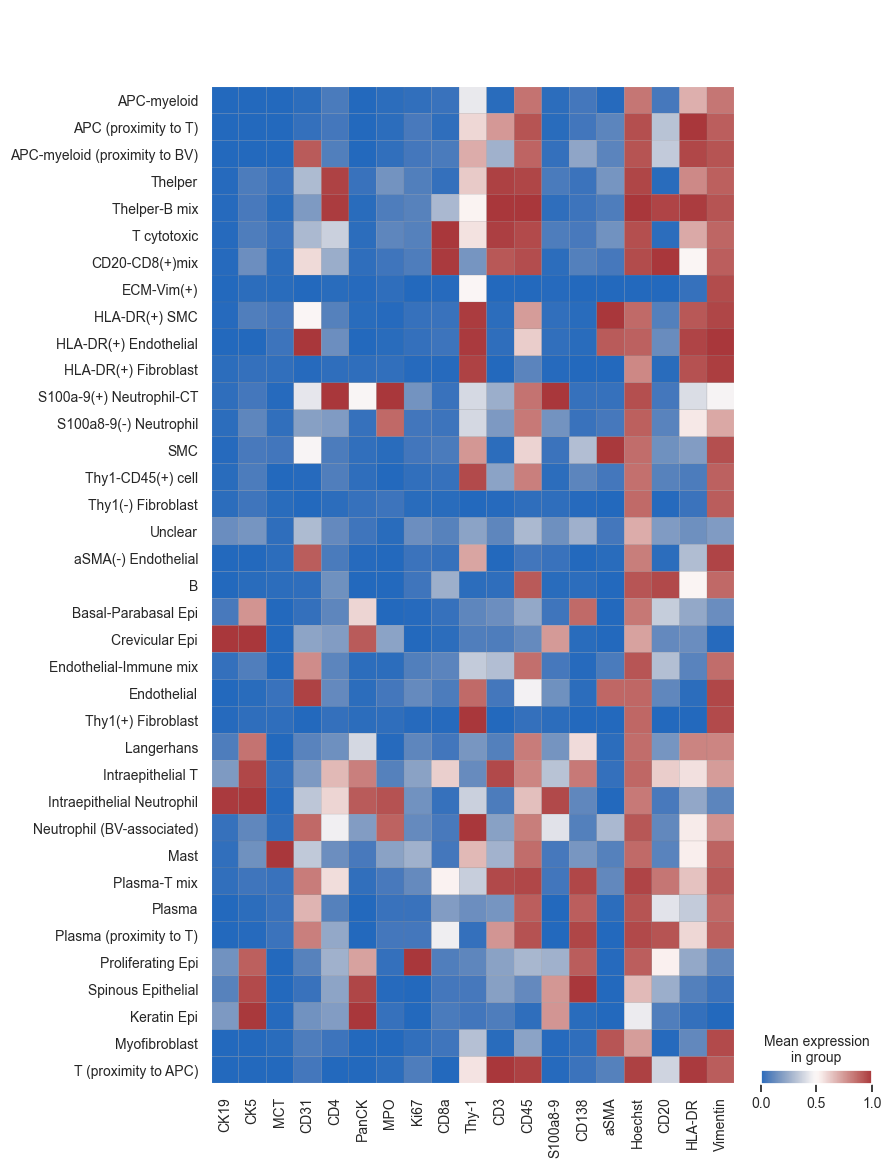

In [4]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='spatial_cluster', dendrogram=False, use_raw=False, cmap="vlag", standard_scale='var')

In [6]:
#Coarser-level information (level 3)
adata.obs['lvl3_spatial_cluster'] = 'test'

In [83]:
APCmajor_kmeans = ['APC (proximity to T cell)','APC', 'APC (proximity to blood vessel)']
adata.obs.loc[adata.obs['spatial_cluster'].isin(APCmajor_kmeans), 'lvl3_spatial_cluster'] = 'APC-myeloid'

In [84]:
CD4_kmeans = ['CD4 T cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(CD4_kmeans), 'lvl3_spatial_cluster'] = 'CD4 T cell'

In [85]:
CD8_kmeans = ['CD8 T cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(CD8_kmeans), 'lvl3_spatial_cluster'] = 'CD8 T cell'

In [86]:
SMCmajor_kmeans = ['HLA-DR(+) SMC', 'SMC', ]
adata.obs.loc[adata.obs['spatial_cluster'].isin(SMCmajor_kmeans), 'lvl3_spatial_cluster'] = 'SMC'

In [87]:
Fibromajor_kmeans = ['fibroblast','HLA-DR(+) fibroblast','Thy-1(-) fibroblast']
adata.obs.loc[adata.obs['spatial_cluster'].isin(Fibromajor_kmeans), 'lvl3_spatial_cluster'] = 'fibroblast'

In [89]:
Endomajor_kmeans = ['HLA-DR(+) endothelial cell', 'aSMA(-) endothelial cell', 'endothelial cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(Endomajor_kmeans), 'lvl3_spatial_cluster'] = 'endothelial cell'

In [90]:
TEpi_kmeans = ['intraepithelial T cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(TEpi_kmeans), 'lvl3_spatial_cluster'] = 'intraepithelial T cell'

In [91]:
Neut_kmeans = ['S100a8/9(-) neutrophil', 'S100a8/9(+) neutrophil, CT', 'intravascular neutrophil']
adata.obs.loc[adata.obs['spatial_cluster'].isin(Neut_kmeans), 'lvl3_spatial_cluster'] = 'neutrophil'

In [11]:
Neut2_kmeans = ['intraepithelial neutrophil']
adata.obs.loc[adata.obs['spatial_cluster'].isin(Neut2_kmeans), 'lvl3_spatial_cluster'] = 'intraepithelial neutrophil'

In [93]:
Unknownmix_kmeans = ['Unknown','Unknown2','endothelial / immune mix','Thy-1(+) / CD45(+) cell','plasma / T cell mix','Extracellular matrix / Vim(+)','CD8 T cell / b cell mix', ]
adata.obs.loc[adata.obs['spatial_cluster'].isin(Unknownmix_kmeans), 'lvl3_spatial_cluster'] = 'other'

In [94]:
TAPCmix_kmeans = ['CD4 T cell / b cell mix', 'T cell (proximity to APC)']
adata.obs.loc[adata.obs['spatial_cluster'].isin(TAPCmix_kmeans), 'lvl3_spatial_cluster'] = 'T cell / APC mix'

In [95]:
Bmajor_kmeans = ['b cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(Bmajor_kmeans), 'lvl3_spatial_cluster'] = 'b cell'

In [96]:
BasalEpi_kmeans = ['basal/parabasal epithelial cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(BasalEpi_kmeans), 'lvl3_spatial_cluster'] = 'basal / parabasal epithelial cell'

In [97]:
CrEpi_kmeans = ['crevicular epithelial cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(CrEpi_kmeans), 'lvl3_spatial_cluster'] = 'crevicular epithelial cell'

In [98]:
CrEpi_kmeans = ['keratin epithelial cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(CrEpi_kmeans), 'lvl3_spatial_cluster'] = 'keratin epithelial cell'

In [99]:
LCmajor_kmeans = ['intraepithelial APC']
adata.obs.loc[adata.obs['spatial_cluster'].isin(LCmajor_kmeans), 'lvl3_spatial_cluster'] = 'Langerhans cell'

In [100]:
Mast_kmeans = ['mast cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(Mast_kmeans), 'lvl3_spatial_cluster'] = 'mast cell'

In [101]:
Plasmamajor_kmeans = ['plasma cell','plasma cell / proximity to T cell', 'PB']
adata.obs.loc[adata.obs['spatial_cluster'].isin(Plasmamajor_kmeans), 'lvl3_spatial_cluster'] = 'plasma cell'

In [102]:
ProlEpi_kmeans = ['proliferating epithelial cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(ProlEpi_kmeans), 'lvl3_spatial_cluster'] = 'proliferating epithelial cell'

In [103]:
SpEpi_kmeans = ['spinous epithelial cell']
adata.obs.loc[adata.obs['spatial_cluster'].isin(SpEpi_kmeans), 'lvl3_spatial_cluster'] = 'spinous epithelial cell'

In [12]:
adata.obs['lvl3_spatial_cluster'].value_counts()

APC-myeloid        56700
Other              51253
Neutrophil         38151
Basal-Parabasal    33906
Spinous            30705
Plasma             29098
SMC                20193
Fibroblast         16251
T-APC mix          15728
T helper           12164
Mast               10192
Proliferating       9854
Endothelial         9171
Crevicular          7637
T cytotoxic         6978
Neut (IE)           6308
Langerhans          5214
B                   3703
Keratin             3372
T (IE)              2462
Myofibroblast       1748
Name: lvl3_spatial_cluster, dtype: int64

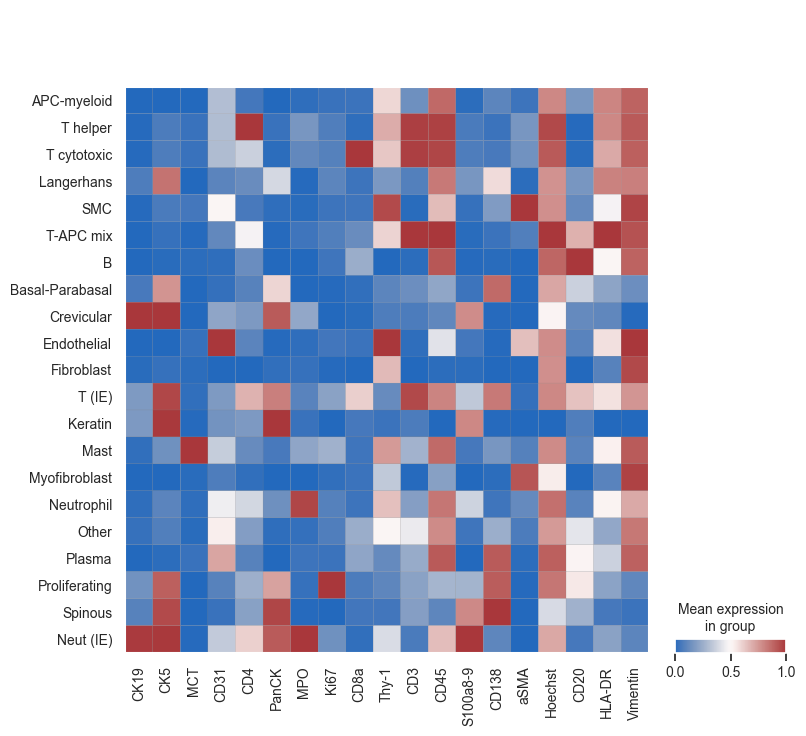

In [13]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl3_spatial_cluster', dendrogram=False, use_raw=False, cmap="vlag", standard_scale='var')

In [106]:
#Lvl2 information
adata.obs['lvl2_spatial_cluster'] = 'test'

In [107]:
APCmajorcl_kmeans = ['APC-myeloid','Langerhans cell']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(APCmajorcl_kmeans), 'lvl2_spatial_cluster'] = 'Myeloid'

In [108]:
Lymphoid_kmeans = ['CD4 T cell','CD8 T cell', 'intraepithelial T cell', 'plasma cell', 'b cell','T cell / APC mix']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(Lymphoid_kmeans), 'lvl2_spatial_cluster'] = 'Lymphoid'

In [119]:
SurfaceEpi_kmeans = ['basal / parabasal epithelial cell', 'spinous epithelial cell', 'proliferating epithelial cell','keratin epithelial cell']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(SurfaceEpi_kmeans), 'lvl2_spatial_cluster'] = 'Epi (oral)'

In [110]:
CrEpi_kmeans = ['crevicular epithelial cell']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(CrEpi_kmeans), 'lvl2_spatial_cluster'] = 'Epi (crevicular)'

In [111]:
Endomajorcl_kmeans = ['endothelial cell']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(Endomajorcl_kmeans), 'lvl2_spatial_cluster'] = 'Endothelial'

In [112]:
SMCmajorcl_kmeans = ['SMC']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(SMCmajorcl_kmeans), 'lvl2_spatial_cluster'] = 'SMC'

In [113]:
Neutmajorcl_kmeans = ['neutrophil','intraepithelial neutrophil','mast cell']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(Neutmajorcl_kmeans), 'lvl2_spatial_cluster'] = 'Granulocytic'

In [114]:
Mixmajorcl_kmeans = ['other']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(Mixmajorcl_kmeans), 'lvl2_spatial_cluster'] = 'Other'

In [9]:
#retrospective addition of those two clusters into Lymphoid and Immune. They stayed as other in the lvl3
Lymphoidmix_kmeans = ['Plasma-T mix','CD20-CD8(+)mix ']
adata.obs.loc[adata.obs['spatial_cluster'].isin(Lymphoidmix_kmeans), 'lvl2_spatial_cluster'] = 'Lymphoid'

In [115]:
Fibromajorcl_kmeans = ['fibroblast']
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(Fibromajorcl_kmeans), 'lvl2_spatial_cluster'] = 'Fibroblast'

In [10]:
adata.obs['lvl2_spatial_cluster'].value_counts()

Lymphoid            80574
Epi (oral)          77837
Myeloid             61914
Granulocytic        54651
Other               40812
SMC                 20193
Fibroblast          16251
Endothelial          9171
Epi (crevicular)     7637
Myofibroblast        1748
Name: lvl2_spatial_cluster, dtype: int64

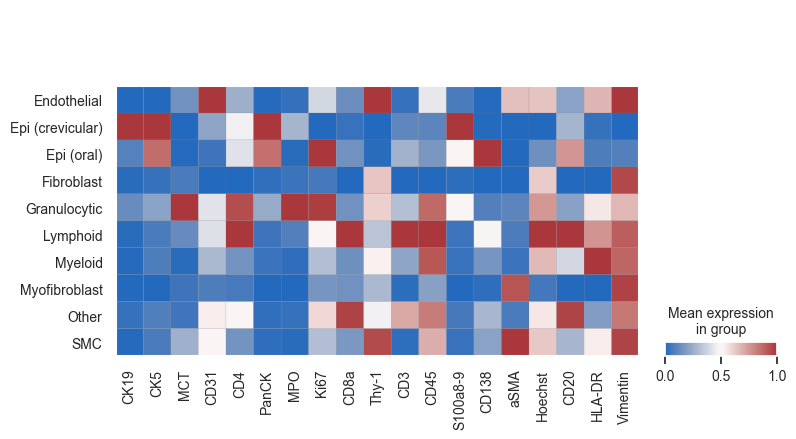

In [8]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl2_spatial_cluster', dendrogram=False, use_raw=False, cmap="vlag", standard_scale='var')

In [122]:
#Major populations, Epithelial, Immune, Vascular, Fibroblast and Others
adata.obs['lvl1_spatial_cluster'] = 'test'

In [123]:
Epi_kmeans = ['Epi (oral)','Epi (crevicular)']
adata.obs.loc[adata.obs['lvl2_spatial_cluster'].isin(Epi_kmeans), 'lvl1_spatial_cluster'] = 'Epithelial'

In [11]:
Immune_kmeans = ['Lymphoid','Myeloid','Granulocytic']
adata.obs.loc[adata.obs['lvl2_spatial_cluster'].isin(Immune_kmeans), 'lvl1_spatial_cluster'] = 'Immune'

In [125]:
Fibroblast_kmeans = ['Fibroblast']
adata.obs.loc[adata.obs['lvl2_spatial_cluster'].isin(Fibroblast_kmeans), 'lvl1_spatial_cluster'] = 'Fibroblast'

In [126]:
Vascular_kmeans = ['SMC','Endothelial']
adata.obs.loc[adata.obs['lvl2_spatial_cluster'].isin(Vascular_kmeans), 'lvl1_spatial_cluster'] = 'Vascular'

In [127]:
Mix_kmeans = ['Other']
adata.obs.loc[adata.obs['lvl2_spatial_cluster'].isin(Mix_kmeans), 'lvl1_spatial_cluster'] = 'Other'

In [12]:
adata.obs['lvl1_spatial_cluster'].value_counts()

Immune        197139
Epithelial     85474
Other          40812
Vascular       29364
Fibroblast     17999
Name: lvl1_spatial_cluster, dtype: int64

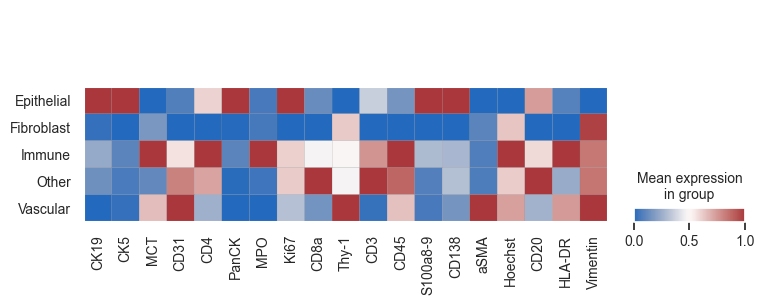

In [13]:
sc.pl.matrixplot(adata, var_names= adata.var.index, groupby='lvl1_spatial_cluster', dendrogram=False, use_raw=False, cmap="vlag", standard_scale='var')

In [14]:
adata.write_h5ad("/data/vasileiosionat2/IBEX_FINAL/Scimap/Adata/adata_ROIs.h5ad")

In [131]:
adata.obs

,X_centroid,Y_centroid,Area,MajorAxisLength,MinorAxisLength,Eccentricity,Solidity,Extent,Orientation,CellID,...,kmeans,cluster,spatial_cluster,Surface_Epi,MyoF,CT,kmeans_new,lvl3_spatial_cluster,lvl2_spatial_cluster,lvl1_spatial_cluster
HV196B_HV196B_0_1,4063.439560,117.074176,364.0,22.370634,21.038466,0.339932,0.943005,0.659420,0.602195,1,...,epithelial-2-0,crevicular / keratin epithelial cell,keratin epithelial cell,Surface_Epi,Other,Other,keratin epithelial cell,keratin epithelial cell,Epi (oral),Epithelial
HV196B_HV196B_0_2,3906.382114,121.085366,246.0,20.441847,17.120427,0.546409,0.907749,0.615000,0.490423,2,...,epithelial-2-0,crevicular / keratin epithelial cell,keratin epithelial cell,Surface_Epi,Other,Other,keratin epithelial cell,keratin epithelial cell,Epi (oral),Epithelial
HV196B_HV196B_0_3,4046.433333,119.300000,150.0,16.610911,12.183316,0.679741,0.887574,0.721154,-1.513358,3,...,epithelial-2-0,crevicular / keratin epithelial cell,keratin epithelial cell,Surface_Epi,Other,Other,keratin epithelial cell,keratin epithelial cell,Epi (oral),Epithelial
HV196B_HV196B_0_4,3925.083102,125.171745,722.0,36.032598,26.241478,0.685290,0.918575,0.705767,-0.564508,4,...,epithelial-2-0,crevicular / keratin epithelial cell,keratin epithelial cell,Surface_Epi,Other,Other,keratin epithelial cell,keratin epithelial cell,Epi (oral),Epithelial
HV196B_HV196B_0_5,3950.053150,129.606299,508.0,27.802349,25.184052,0.423653,0.862479,0.627160,1.367100,5,...,epithelial-2-0,crevicular / keratin epithelial cell,keratin epithelial cell,Surface_Epi,Other,Other,keratin epithelial cell,keratin epithelial cell,Epi (oral),Epithelial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HV195A1_HV195A1_0_7084,3129.127196,3308.111736,1423.0,51.882097,36.168967,0.716937,0.918065,0.748947,-1.517308,7084,...,epithelial-3-1,proliferating epithelial cell,proliferating epithelial cell,Surface_Epi,Other,Other,proliferating epithelial cell,proliferating epithelial cell,Epi (oral),Epithelial
HV195A1_HV195A1_0_7085,2959.323333,3307.864444,900.0,37.111385,31.354542,0.534961,0.955414,0.802139,-0.885370,7085,...,epithelial-1-0,proliferating epithelial cell,proliferating epithelial cell,Surface_Epi,Other,Other,proliferating epithelial cell,proliferating epithelial cell,Epi (oral),Epithelial
HV195A1_HV195A1_0_7086,2994.039424,3311.975739,1319.0,50.436389,35.218756,0.715824,0.913435,0.769096,-1.453366,7086,...,epithelial-3-1,proliferating epithelial cell,proliferating epithelial cell,Surface_Epi,Other,Other,proliferating epithelial cell,proliferating epithelial cell,Epi (oral),Epithelial
HV195A1_HV195A1_0_7087,3047.255569,3311.067995,1706.0,64.079403,35.168771,0.835933,0.948305,0.880289,-1.540987,7087,...,epithelial-1-0,proliferating epithelial cell,proliferating epithelial cell,Surface_Epi,Other,Other,proliferating epithelial cell,proliferating epithelial cell,Epi (oral),Epithelial


In [9]:
#Defining Epiuthelial and Connective Tissue region
import pandas as pd

# List of categories that should be labeled as 'Epi'
epi_categories = [
    'basal / parabasal epithelial cell',
    'spinous epithelial cell',
    'proliferating epithelial cell',
    'crevicular epithelial cell',
    'intraepithelial neutrophil',
    'Langerhans cell',
    'keratin epithelial cell',
    'intraepithelial T cell'
]

# Create a new column 'Region' with default value 'CT'
adata.obs['Region'] = 'CT'

# Update 'Region' to 'Epi' for the specified categories
adata.obs.loc[adata.obs['lvl3_spatial_cluster'].isin(epi_categories), 'Region'] = 'Epi'
